### Project: Write a Data Science Blog Post

### Business Understanding
Airbnb is a company that provides a platform for persons to advertise their properties to other persons for the purposing of renting it. Once rented, Airbnb will collect a premium for this service. This has become very popular similar to Uber and other types of companies which used the same philosophy of not owning the asset. The reason for this post is to help you understand certain key points for you to consider if you were interested in becoming an Airbnb client for your property.

The questions we will focus on are the following which should provide some insights on the subject.

1) Which property type is the most popular?

2) What is the most popular price for the most popular property type?

3) What is the most popular bathroom for the most popular property type?

In [1]:
# import the relevant libraries
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt

### Data Understanding

Assess and Explore Data

This will explore the data to gain an understanding of how it relates to each other.
The reading of the data files will be executed here to load it into the dataframes.

In [2]:
# read the csv files into pandas data frames
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
# get the first few records to understand the data
calendar.info()
calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# get the first few records to understand the data
listings.info()
listings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# get the first few records to understand the data
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Data Preparation

Clean Data

This will remove unncessary columns, replace nulls and ensure the data is good for use later on.

In [6]:
# create a new dataframe with the minimum columns needed for
# the problems. It takes the columns listed below from the
# main dataframe which has 92 columns. This will improve
# performance as well as easy to manipulate
listings_revised = listings.reindex(
    columns=['id', 'name', 'property_type', 'price', 'bathrooms'])

In [7]:
# check for nulls
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [8]:
# check for nulls
listings_revised.isnull().sum()

id                0
name              0
property_type     1
price             0
bathrooms        16
dtype: int64

In [9]:
# check for nulls
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [10]:
# find the mode value in the dataset which is the value
# that shows up the most frequently
listings_revised['property_type'].mode()

0    House
Name: property_type, dtype: object

In [11]:
# replace the nulls with the mode value.
# the reason why the record with the null property type
# was not dropped is because the I will want to use it later
# on and I assigned it the mode value. This guess to use the
# mode is okay in this case since number of missing data is negligible.
listings_revised['property_type'].fillna('House', inplace=True)

In [12]:
# find the mode value in the dataset which is the value
# that shows up the most frequently
listings_revised['bathrooms'].mode()

0    1.0
Name: bathrooms, dtype: float64

In [13]:
# replace the nulls with the mode value.
# the reason why the record with the null property type
# was not dropped is because the I will want to use it later
# on and I assigned it the mode value. This guess to use the
# mode is okay in this case since number of missing data is negligible.
listings_revised['bathrooms'].fillna(1.0, inplace=True)

In [14]:
# check for nulls
listings_revised.isnull().sum()

id               0
name             0
property_type    0
price            0
bathrooms        0
dtype: int64

In [15]:
# describe the data
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [16]:
# explore the data
listings_revised.head()

,id,name,property_type,price,bathrooms
0,241032,Stylish Queen Anne Apartment,Apartment,$85.00,1.0
1,953595,Bright & Airy Queen Anne Apartment,Apartment,$150.00,1.0
2,3308979,New Modern House-Amazing water view,House,$975.00,4.5
3,7421966,Queen Anne Chateau,Apartment,$100.00,1.0
4,278830,Charming craftsman 3 bdm house,House,$450.00,2.0


In [17]:
# describe the data
listings_revised.describe()

,id,bathrooms
count,3.818000e+03,3818.000000
mean,5.550111e+06,1.258381
std,2.962660e+06,0.589369
min,3.335000e+03,0.000000
25%,3.258256e+06,1.000000
50%,6.118244e+06,1.000000
75%,8.035127e+06,1.000000
max,1.034016e+07,8.000000


In [18]:
# describe the data
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [19]:
def print_dataframe_and_memory_usage(df):
    '''
    This function provides information on the dataframe
    as well as how much memory is being used to help
    ensure the code is not using too much resources.
    Input:
    Dataframe
    Output:
    printed contents of dataframe and memory usage
    '''
    print('Dataframe:')
    print(df)
    print('Memory Usage')
    print(sys.getsizeof(df))

### Evaluation

### Question 1: Which property type is the most popular?

In [20]:
# create a new dataframe with the counts sorted
# with the highest counts first. It provides a
# list of all the property types with the number
# of listings counted per property type.
property_type = listings_revised.groupby(
    ['property_type'])['id'].count().sort_values(ascending=False)

In [21]:
# This shows the contents of the dataframe as well
# as how much memory is being used
print_dataframe_and_memory_usage(property_type)

Dataframe:
property_type
House              1734
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: id, dtype: int64
Memory Usage
1183


Text(0.5, 1.0, 'Property types and number of listing counts')

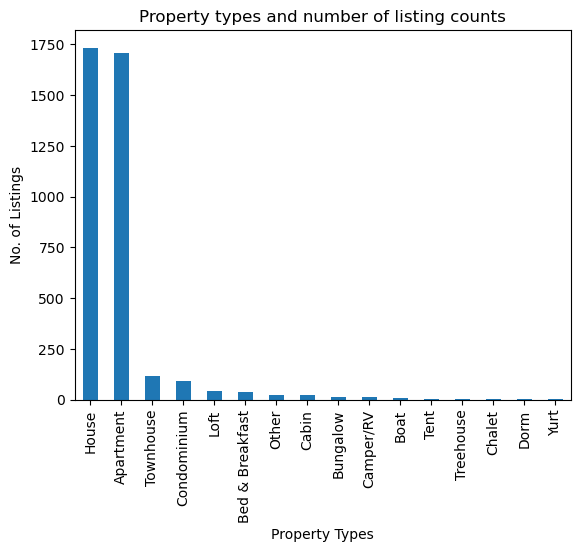

In [22]:
# plot the data with the dataframe from above. This shows
# the relationship between the number of listings and the
# property types.
property_type.plot(kind='bar')  # this plots the chart
plt.xlabel('Property Types')
plt.ylabel('No. of Listings')
plt.title('Property types and number of listing counts')

Although it is noticeable that Houses are the most popular property types, you can also see from the visualization that the other main competitor will be Apartments. This provides a further option if needed in case you are unable to purchase a house.
The other properties are very low in numbers hence it may not be a good purchase.

### Question 2: What is the most popular price for the most popular property type?

In [23]:
# create a new dataframe filtered by houses only
# to determine the trend and popular price
house_prices = listings_revised[listings_revised['property_type'] == 'House']

In [24]:
# explore the data
house_prices.head()

,id,name,property_type,price,bathrooms
2,3308979,New Modern House-Amazing water view,House,$975.00,4.5
4,278830,Charming craftsman 3 bdm house,House,$450.00,2.0
5,5956968,Private unit in a 1920s mansion,House,$120.00,1.0
6,1909058,Queen Anne Private Bed and Bath,House,$80.00,1.0
10,175576,Private Apartment - Queen Anne Hill,House,$95.00,1.0


In [25]:
# check for information
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 2 to 3815
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1734 non-null   int64  
 1   name           1734 non-null   object 
 2   property_type  1734 non-null   object 
 3   price          1734 non-null   object 
 4   bathrooms      1734 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.3+ KB


In [26]:
# create a new dataframe with the counts sorted with the
# highest counts first. It provides a list of all the
# property types with the number of listings counted
# per property type.
house_prices = house_prices.groupby(
    ['price'])['id'].count().sort_values(ascending=False)

In [27]:
# This shows the contents of the dataframe as
# well as how much memory is being used
print_dataframe_and_memory_usage(house_prices)

Dataframe:
price
$55.00       59
$65.00       57
$150.00      54
$100.00      53
$75.00       51
             ..
$254.00       1
$255.00       1
$499.00       1
$495.00       1
$1,000.00     1
Name: id, Length: 220, dtype: int64
Memory Usage
15801


In [28]:
# check for information
house_prices.info()

<class 'pandas.core.series.Series'>
Index: 220 entries, $55.00 to $1,000.00
Series name: id
Non-Null Count  Dtype
--------------  -----
220 non-null    int64
dtypes: int64(1)
memory usage: 3.4+ KB


Text(0.5, 1.0, 'Different daily prices and the number of listings')

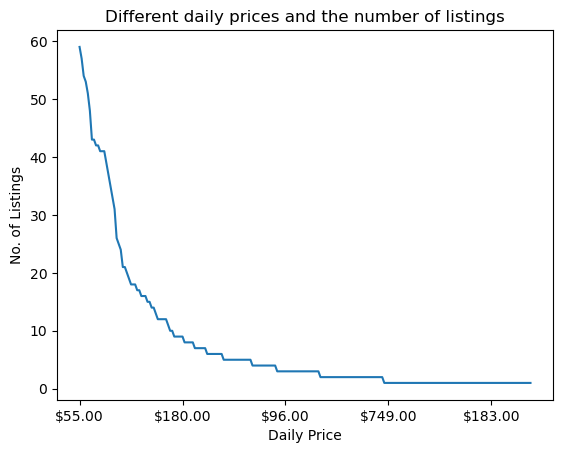

In [29]:
# plot the data. This shows the relationship
# between the number of listings and the
# daily prices.
house_prices.plot(kind='line')  # this plots the chart
plt.xlabel('Daily Price')
plt.ylabel('No. of Listings')
plt.title('Different daily prices and the number of listings')

From the visualization above, it can be seen that the prices vary a lot but with the right price point of $ 55 to 
enter the market, you can then easily make small changes in price to determine if it is favourable for you profits.

### Question 3: What is the most popular bathroom for the most popular property type?

In [30]:
# create a new dataframe filtered by houses only
# to determine the trend and popular bathrooms
house_bathrooms = listings_revised[
    listings_revised['property_type'] == 'House']

In [31]:
# explore the data
house_bathrooms.head()

,id,name,property_type,price,bathrooms
2,3308979,New Modern House-Amazing water view,House,$975.00,4.5
4,278830,Charming craftsman 3 bdm house,House,$450.00,2.0
5,5956968,Private unit in a 1920s mansion,House,$120.00,1.0
6,1909058,Queen Anne Private Bed and Bath,House,$80.00,1.0
10,175576,Private Apartment - Queen Anne Hill,House,$95.00,1.0


In [32]:
# check for information
house_bathrooms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 2 to 3815
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1734 non-null   int64  
 1   name           1734 non-null   object 
 2   property_type  1734 non-null   object 
 3   price          1734 non-null   object 
 4   bathrooms      1734 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.3+ KB


In [33]:
# create a new dataframe with the counts sorted with the
# highest counts first. It provides a list of all the property types
# with the number of listings counted per property type.
house_bathrooms = house_bathrooms.groupby(['bathrooms'])['id'].count().sort_values(ascending=False)

In [34]:
# This shows the contents of the dataframe
# as well as how much memory is being used
print_dataframe_and_memory_usage(house_bathrooms)

Dataframe:
bathrooms
1.0    1132
2.0     205
1.5     161
2.5      98
3.0      56
3.5      50
0.5      19
4.0       7
0.0       3
4.5       2
5.0       1
Name: id, dtype: int64
Memory Usage
208


In [35]:
# check for information
house_bathrooms.info()

<class 'pandas.core.series.Series'>
Index: 11 entries, 1.0 to 5.0
Series name: id
Non-Null Count  Dtype
--------------  -----
11 non-null     int64
dtypes: int64(1)
memory usage: 176.0 bytes


Text(0.5, 1.0, 'Different bathrooms and the number of listings')

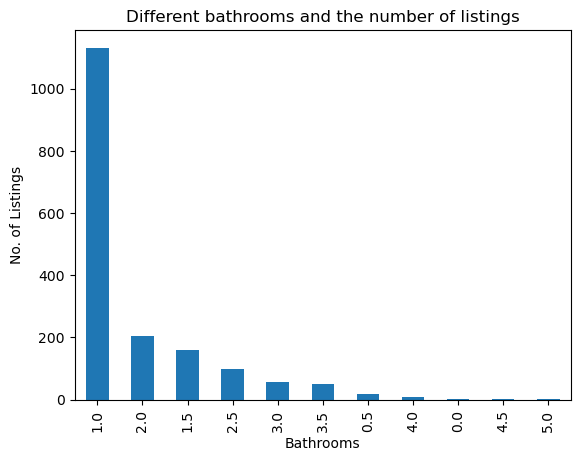

In [36]:
# plot the data. This shows the relationship
# between the number of listings and the
# number of bathrooms for houses.
house_bathrooms.plot(kind='bar')  # this plots the chart
plt.xlabel('Bathrooms')
plt.ylabel('No. of Listings')
plt.title('Different bathrooms and the number of listings')

From the visualization above, it can be seen that most houses has just 1 bathroom hence if you purchase a house with just
1 bathroom, if should be acceptable by the customers. As you also notice, the houses with 2 or more bathrooms are low
so it may also reflect the market when searching for a house to purchase where this might also be the case.